In [48]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Data Preprocessing 

In [49]:
#import dataset 
gene_data = pd.read_csv(r'GSE48350_series_matrix.csv')
#import gene annotation
gene_annotation = pd.read_csv(r'GeneAnnotation.csv', low_memory=False,)
#import the state
state = pd.read_csv(r'State.csv')

In [50]:
#Check data structure
gene_data.shape

(54675, 254)

In [51]:
#Check data info
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Columns: 254 entries, ID_REF to GSM1176275
dtypes: float64(253), object(1)
memory usage: 106.0+ MB


In [52]:
#Gene dataset
gene_data.head()

,ID_REF,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
0,1007_s_at,0.888016,1.435518,1.609601,1.754960,1.820730,1.439672,1.587641,0.524710,0.796570,...,1.028650,0.774286,1.337073,1.244907,2.087099,0.959862,1.441913,0.904624,0.669172,0.713999
1,1053_at,0.666460,0.885852,1.859078,1.036666,1.421393,1.485035,1.186292,0.876624,0.917716,...,1.044734,0.789405,0.838707,0.825675,1.004600,0.936117,1.000000,0.834758,1.122123,1.202849
2,117_at,0.859638,1.062030,3.097395,2.243655,5.060301,13.800817,2.211287,0.824494,1.650645,...,0.931451,1.903424,1.452228,1.548969,1.064989,0.948225,0.825223,1.081357,1.489901,1.476950
3,121_at,0.975150,1.050745,0.982284,1.198237,1.039529,0.781454,1.011910,1.151515,0.960083,...,0.980565,1.152982,1.000000,0.594645,1.024383,1.140066,0.577931,1.156676,0.861224,1.128132
4,1255_g_at,0.491255,0.537525,3.179645,1.514290,2.185801,3.541644,2.213126,1.422447,5.011413,...,0.560050,0.554573,0.613756,0.521582,0.530901,0.548742,0.458067,0.552341,0.474526,0.559091


In [53]:
#Gene annotation dataset for probe id
gene_annotation.head()

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [54]:
#Rename the ID column with ID_REF to merge with the gene dataset later
gene_annotation = gene_annotation.rename(columns={'ID':'ID_REF'})

In [55]:
#Get the probe id with respective gene symbol
gene_annotation = gene_annotation[["ID_REF", "Gene Symbol"]]
gene_annotation.head()

,ID_REF,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A


In [56]:
#Merge gene dataset with gene annotation dataset
gene_data = gene_annotation.merge(gene_data)
#Drop the probe id
gene_data = gene_data.drop(["ID_REF"], axis = 1)
gene_data.head()

,Gene Symbol,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
0,DDR1 /// MIR4640,0.888016,1.435518,1.609601,1.754960,1.820730,1.439672,1.587641,0.524710,0.796570,...,1.028650,0.774286,1.337073,1.244907,2.087099,0.959862,1.441913,0.904624,0.669172,0.713999
1,RFC2,0.666460,0.885852,1.859078,1.036666,1.421393,1.485035,1.186292,0.876624,0.917716,...,1.044734,0.789405,0.838707,0.825675,1.004600,0.936117,1.000000,0.834758,1.122123,1.202849
2,HSPA6,0.859638,1.062030,3.097395,2.243655,5.060301,13.800817,2.211287,0.824494,1.650645,...,0.931451,1.903424,1.452228,1.548969,1.064989,0.948225,0.825223,1.081357,1.489901,1.476950
3,PAX8,0.975150,1.050745,0.982284,1.198237,1.039529,0.781454,1.011910,1.151515,0.960083,...,0.980565,1.152982,1.000000,0.594645,1.024383,1.140066,0.577931,1.156676,0.861224,1.128132
4,GUCA1A,0.491255,0.537525,3.179645,1.514290,2.185801,3.541644,2.213126,1.422447,5.011413,...,0.560050,0.554573,0.613756,0.521582,0.530901,0.548742,0.458067,0.552341,0.474526,0.559091


In [57]:
#Check the data structure 
gene_data.shape

(54675, 254)

In [58]:
#Check for the missing value
pd.isna(gene_data["Gene Symbol"]).sum()

8893

In [59]:
#Drop the rows where the gene symbol is null
gene_data = gene_data.dropna()
gene_data.head()

,Gene Symbol,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
0,DDR1 /// MIR4640,0.888016,1.435518,1.609601,1.754960,1.820730,1.439672,1.587641,0.524710,0.796570,...,1.028650,0.774286,1.337073,1.244907,2.087099,0.959862,1.441913,0.904624,0.669172,0.713999
1,RFC2,0.666460,0.885852,1.859078,1.036666,1.421393,1.485035,1.186292,0.876624,0.917716,...,1.044734,0.789405,0.838707,0.825675,1.004600,0.936117,1.000000,0.834758,1.122123,1.202849
2,HSPA6,0.859638,1.062030,3.097395,2.243655,5.060301,13.800817,2.211287,0.824494,1.650645,...,0.931451,1.903424,1.452228,1.548969,1.064989,0.948225,0.825223,1.081357,1.489901,1.476950
3,PAX8,0.975150,1.050745,0.982284,1.198237,1.039529,0.781454,1.011910,1.151515,0.960083,...,0.980565,1.152982,1.000000,0.594645,1.024383,1.140066,0.577931,1.156676,0.861224,1.128132
4,GUCA1A,0.491255,0.537525,3.179645,1.514290,2.185801,3.541644,2.213126,1.422447,5.011413,...,0.560050,0.554573,0.613756,0.521582,0.530901,0.548742,0.458067,0.552341,0.474526,0.559091


In [60]:
#Check the duplicated value
gene_data.duplicated(["Gene Symbol"]).sum()

22264

In [61]:
#Average the duplicated value
gene_data = gene_data.groupby(["Gene Symbol"], sort=False).mean().reset_index()
gene_data.head()

,Gene Symbol,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
0,DDR1 /// MIR4640,0.943973,1.454540,1.623692,1.776458,1.810971,1.475547,1.569246,0.596478,0.795418,...,0.972033,0.705259,1.350855,1.236381,1.981746,0.892722,1.425407,0.834009,0.673816,0.649950
1,RFC2,0.687646,0.761752,1.855645,1.142628,1.595322,1.550219,1.223388,0.939754,0.918702,...,1.362384,0.810292,0.718305,0.807546,1.098929,1.059291,1.091232,0.841218,1.141876,1.310481
2,HSPA6,1.229530,1.274039,5.593506,4.667587,10.008817,26.612462,2.541313,0.795910,1.306073,...,0.724440,2.244741,1.245818,3.062663,1.820737,0.932535,0.747579,1.304752,2.398056,2.355554
3,PAX8,0.766492,0.698718,0.475281,0.474368,0.486351,0.390060,0.459916,0.803283,0.811803,...,0.678956,0.709625,0.716893,0.582702,0.654354,0.701926,0.592805,0.728323,0.781217,0.711774
4,GUCA1A,0.580868,0.506859,2.142796,1.268686,1.560693,2.483802,1.566996,1.326729,2.314406,...,0.533101,0.526175,0.550499,0.483741,0.482982,0.527115,0.474146,0.531682,0.495066,0.538032


In [62]:
#Check the data structure 
gene_data.shape

(23518, 254)

In [63]:
#Transpose the dataset
gene_data = gene_data.set_index("Gene Symbol").transpose()
gene_data = gene_data.rename_axis("Gene Symbol").reset_index()
gene_data = gene_data.rename_axis(None, axis = 1)
gene_data = gene_data.rename(columns={"Gene Symbol": "Sample Name"})

In [64]:
#Example of dataset
gene_data.head()

,Sample Name,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,GALR3,MINOS1-NBL1 /// NBL1,NUS1P3,MROH7-TTC4 /// TTC4,LIME1 /// ZGPAT,LOC102725263 /// LOC389906,C1orf50 /// LOC100129924,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP /// FAM86FP,HNRNPUL2 /// HNRNPUL2-BSCL2,LOC100505915
0,GSM300166,0.943973,0.687646,1.229530,0.766492,0.580868,0.752003,0.924819,0.721398,1.175835,...,0.211006,0.527025,0.674188,1.315114,0.805648,1.434211,0.678902,0.672177,1.524819,0.731788
1,GSM300167,1.454540,0.761752,1.274039,0.698718,0.506859,0.918145,1.022352,0.804217,0.847308,...,0.215501,0.736027,0.771749,1.382584,0.737736,1.116327,1.021100,0.683132,0.967951,0.835300
2,GSM300168,1.623692,1.855645,5.593506,0.475281,2.142796,1.613155,0.909735,0.713965,1.379104,...,0.170187,0.836537,0.588994,0.853621,1.307463,0.769643,0.959904,1.743067,0.640219,0.924637
3,GSM300169,1.776458,1.142628,4.667587,0.474368,1.268686,1.818712,0.792810,0.937429,1.011262,...,0.167595,1.032391,0.543067,1.168329,0.904379,0.917077,0.924352,1.682167,0.482557,0.979003
4,GSM300170,1.810971,1.595322,10.008817,0.486351,1.560693,1.891300,0.894430,0.782761,0.697710,...,0.171205,1.156977,0.483919,1.051331,1.503227,1.017884,1.032945,1.094760,0.618980,0.679888


In [65]:
state.head()

,Sample Name,State
0,GSM300166,Normal Control
1,GSM300167,Normal Control
2,GSM300168,Normal Control
3,GSM300169,Normal Control
4,GSM300170,Normal Control


In [66]:
gene_data = gene_data.merge(state)
gene_data['State'] = gene_data['State'].replace('Normal Control', 0)
gene_data['State'] = gene_data['State'].replace('Alzheimer\'s Disease', 1)
gene_data.head()

,Sample Name,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,MINOS1-NBL1 /// NBL1,NUS1P3,MROH7-TTC4 /// TTC4,LIME1 /// ZGPAT,LOC102725263 /// LOC389906,C1orf50 /// LOC100129924,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP /// FAM86FP,HNRNPUL2 /// HNRNPUL2-BSCL2,LOC100505915,State
0,GSM300166,0.943973,0.687646,1.229530,0.766492,0.580868,0.752003,0.924819,0.721398,1.175835,...,0.527025,0.674188,1.315114,0.805648,1.434211,0.678902,0.672177,1.524819,0.731788,0
1,GSM300167,1.454540,0.761752,1.274039,0.698718,0.506859,0.918145,1.022352,0.804217,0.847308,...,0.736027,0.771749,1.382584,0.737736,1.116327,1.021100,0.683132,0.967951,0.835300,0
2,GSM300168,1.623692,1.855645,5.593506,0.475281,2.142796,1.613155,0.909735,0.713965,1.379104,...,0.836537,0.588994,0.853621,1.307463,0.769643,0.959904,1.743067,0.640219,0.924637,0
3,GSM300169,1.776458,1.142628,4.667587,0.474368,1.268686,1.818712,0.792810,0.937429,1.011262,...,1.032391,0.543067,1.168329,0.904379,0.917077,0.924352,1.682167,0.482557,0.979003,0
4,GSM300170,1.810971,1.595322,10.008817,0.486351,1.560693,1.891300,0.894430,0.782761,0.697710,...,1.156977,0.483919,1.051331,1.503227,1.017884,1.032945,1.094760,0.618980,0.679888,0


In [67]:
gene_data.tail()

,Sample Name,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,MINOS1-NBL1 /// NBL1,NUS1P3,MROH7-TTC4 /// TTC4,LIME1 /// ZGPAT,LOC102725263 /// LOC389906,C1orf50 /// LOC100129924,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP /// FAM86FP,HNRNPUL2 /// HNRNPUL2-BSCL2,LOC100505915,State
248,GSM1176271,0.892722,1.059291,0.932535,0.701926,0.527115,0.766716,0.816207,0.870539,0.896034,...,0.984599,1.049990,0.777084,0.883449,0.961853,0.698768,0.723786,0.537191,1.294434,1
249,GSM1176272,1.425407,1.091232,0.747579,0.592805,0.474146,1.166149,0.846444,1.049307,0.743914,...,0.513067,0.878847,1.193830,1.119651,0.418228,1.050084,0.731850,0.486794,0.553088,1
250,GSM1176273,0.834009,0.841218,1.304752,0.728323,0.531682,0.997243,0.937273,0.961165,0.894874,...,0.780949,0.997974,1.034165,0.898566,1.190535,0.803963,0.522629,0.499019,0.908156,1
251,GSM1176274,0.673816,1.141876,2.398056,0.781217,0.495066,1.368642,0.705225,0.853036,1.193166,...,1.857269,0.983708,1.009702,1.282439,1.111519,1.260084,1.272234,0.963608,0.865594,1
252,GSM1176275,0.649950,1.310481,2.355554,0.711774,0.538032,1.000542,0.718839,0.807795,1.468289,...,1.118086,1.179779,0.979975,1.005294,1.221989,0.904430,1.256541,0.582913,1.225242,1


Exploratory Analysis

In [68]:
#define a list which consist of all the gene names
cols = list(gene_data)
cols.pop(0)

'Sample Name'

In [69]:
cols.pop()

'State'

In [70]:
#define the cond of first group
cond = gene_data['State'] == 0

In [71]:
#define the group 1 and group 2 with their respective genes
group1 = gene_data.loc[cond, cols]
group2 = gene_data.loc[~cond, cols]

In [72]:
#Normal Control group
print(group1)

     DDR1 /// MIR4640      RFC2      HSPA6      PAX8    GUCA1A  \
0            0.943973  0.687646   1.229530  0.766492  0.580868   
1            1.454540  0.761752   1.274039  0.698718  0.506859   
2            1.623692  1.855645   5.593506  0.475281  2.142796   
3            1.776458  1.142628   4.667587  0.474368  1.268686   
4            1.810971  1.595322  10.008817  0.486351  1.560693   
..                ...       ...        ...       ...       ...   
168          1.431127  0.826374   1.471857  0.744838  1.021062   
169          1.163432  1.181748   0.659419  0.653924  0.599753   
170          0.735731  1.111055   0.832447  0.721611  0.523439   
171          1.031894  0.596235   4.406124  0.653488  0.447127   
172          0.896241  0.928054   0.764867  0.638918  0.517035   

     MIR5193 /// UBA7      THRA    PTPN21      CCL5    CYP2E1  ...     GALR3  \
0            0.752003  0.924819  0.721398  1.175835  1.345159  ...  0.211006   
1            0.918145  1.022352  0.804217  0.84

In [73]:
#AD group
print(group2)

     DDR1 /// MIR4640      RFC2     HSPA6      PAX8    GUCA1A  \
173          2.171091  0.983324  1.452702  0.668653  0.862391   
174          1.076774  0.894264  0.927105  0.695776  0.972601   
175          1.868948  0.582919  2.284977  0.811570  0.884974   
176          1.411184  0.666906  2.064448  0.761777  0.871571   
177          1.474658  0.683724  2.172054  0.685714  0.823944   
..                ...       ...       ...       ...       ...   
248          0.892722  1.059291  0.932535  0.701926  0.527115   
249          1.425407  1.091232  0.747579  0.592805  0.474146   
250          0.834009  0.841218  1.304752  0.728323  0.531682   
251          0.673816  1.141876  2.398056  0.781217  0.495066   
252          0.649950  1.310481  2.355554  0.711774  0.538032   

     MIR5193 /// UBA7      THRA    PTPN21      CCL5    CYP2E1  ...     GALR3  \
173          1.123485  0.932258  1.078107  1.154941  0.827504  ...  0.239169   
174          1.048773  0.995720  0.960800  1.362987  0.7873

In [74]:
#T-test
t_value, p_value = stats.ttest_ind(group1, group2, equal_var=False)
for i, col in enumerate(cols):
    print(cols[i],p_value[i])

DDR1 /// MIR4640 0.020190686533995167
RFC2 0.0005392634399773062
HSPA6 0.3952166521091387
PAX8 0.935111793739551
GUCA1A 0.02016885770823007
MIR5193 /// UBA7 0.06159723735654782
THRA 0.8433448616884927
PTPN21 0.00019360533424000128
CCL5 0.2329420533167915
CYP2E1 1.9676555957231592e-05
EPHB3 4.7702514716898035e-05
ESRRA 0.6297478840753074
CYP2A6 0.2132151839753237
SCARB1 0.23406366782105892
TTLL12 0.03022705252159271
LINC00152 /// LOC101930489 0.9880793614309273
WFDC2 0.3619895788609899
MAPK1 0.00025487909549763124
ADAM32 0.4292366803358596
SPATA17 0.1488306337569824
PRR22 0.7655222514439302
PXK 0.33649118990197513
VPS18 0.0007986175828124868
MSANTD3 0.0020015532139835445
SLC46A1 0.21395329143017414
TIMD4 0.13748884169755882
SLC39A5 0.05841322290434878
ZDHHC11 /// ZDHHC11B 0.31228774606581516
ATP6V1E2 0.853968886339722
AFG3L1P 0.008405713527311946
CILP2 0.28907654316709724
PIGX 1.2402015741695088e-05
TMEM196 7.463285940636125e-05
SLC39A13 0.2543719594199828
BEST4 0.8703024200300701
AK9 0

In [75]:
#list of p-value
print(p_value)

[2.01906865e-02 5.39263440e-04 3.95216652e-01 ... 4.93439473e-04
 9.35783237e-01 1.41352525e-03]


In [76]:
#length of the list
print(len(p_value))

23518


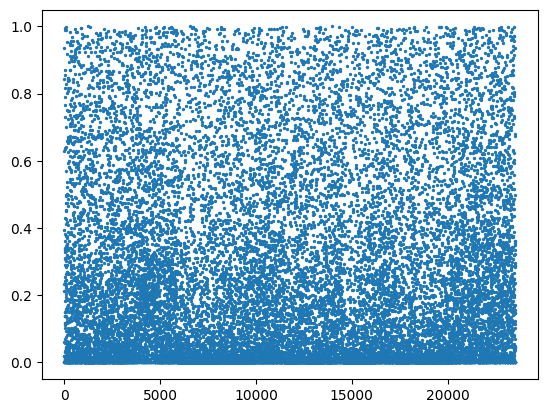

In [77]:
#scatter plot
values=p_value
labels=cols
plt.scatter(range(len(labels)), values, 2)

plt.show()

In [78]:
#insert result to dataframe
gene={'Gene Name': cols, 'P-value': p_value}
dframe = pd.DataFrame(gene)  
dframe

,Gene Name,P-value
0,DDR1 /// MIR4640,0.020191
1,RFC2,0.000539
2,HSPA6,0.395217
3,PAX8,0.935112
4,GUCA1A,0.020169
...,...,...
23513,LOC102725263 /// LOC389906,0.288701
23514,C1orf50 /// LOC100129924,0.000675
23515,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP //...,0.000493
23516,HNRNPUL2 /// HNRNPUL2-BSCL2,0.935783


In [79]:
#Filter to get the data that is rejecting the null hypothesis, 
#left only 9168 genes which are having different means in two groups of data, they might be the gene which can differentiate the state
dframe_filtered=dframe[dframe['P-value'] <= 0.05]
dframe_filtered

,Gene Name,P-value
0,DDR1 /// MIR4640,0.020191
1,RFC2,0.000539
4,GUCA1A,0.020169
7,PTPN21,0.000194
9,CYP2E1,0.000020
...,...,...
23510,NUS1P3,0.000199
23512,LIME1 /// ZGPAT,0.038101
23514,C1orf50 /// LOC100129924,0.000675
23515,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP //...,0.000493


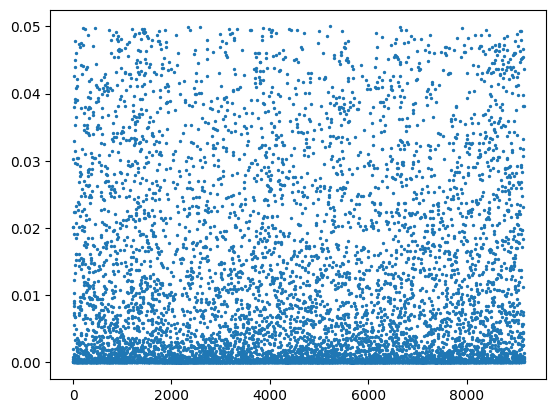

In [80]:
#scatter plot
values=dframe_filtered['P-value'].to_numpy()
labels=dframe_filtered['Gene Name'].to_numpy()
plt.scatter(range(len(labels)), values, 2)

plt.show()

Model Development

In [81]:
gene_name=list(dframe_filtered['Gene Name'])
gene_name.insert(0, 'State')
len(gene_name)

9169

In [82]:
gene_data_filtered=gene_data.drop(columns=[col for col in gene_data if col not in gene_name])

In [83]:
gene_data_filtered.head()

,DDR1 /// MIR4640,RFC2,GUCA1A,PTPN21,CYP2E1,EPHB3,TTLL12,MAPK1,VPS18,MSANTD3,...,HP08942,NAF1,AF086126 /// C16orf52,MINOS1-NBL1 /// NBL1,NUS1P3,LIME1 /// ZGPAT,C1orf50 /// LOC100129924,FAM86B1 /// FAM86B2 /// FAM86C1 /// FAM86DP /// FAM86FP,LOC100505915,State
0,0.943973,0.687646,0.580868,0.721398,1.345159,0.947769,0.997266,0.649563,0.875360,0.521570,...,1.076925,0.805249,1.535717,0.527025,0.674188,0.805648,0.678902,0.672177,0.731788,0
1,1.454540,0.761752,0.506859,0.804217,1.038916,1.110470,0.991348,0.825813,0.642574,0.707343,...,1.005574,0.554322,0.952598,0.736027,0.771749,0.737736,1.021100,0.683132,0.835300,0
2,1.623692,1.855645,2.142796,0.713965,2.256112,0.595208,1.137299,0.915067,1.328859,1.110447,...,1.253946,2.035300,0.381737,0.836537,0.588994,1.307463,0.959904,1.743067,0.924637,0
3,1.776458,1.142628,1.268686,0.937429,1.551460,1.019388,1.151687,0.985946,1.058709,0.715292,...,1.168776,1.910075,0.317363,1.032391,0.543067,0.904379,0.924352,1.682167,0.979003,0
4,1.810971,1.595322,1.560693,0.782761,1.439223,0.910313,1.278787,0.855747,1.227975,0.831908,...,1.041756,1.920245,0.339831,1.156977,0.483919,1.503227,1.032945,1.094760,0.679888,0


In [84]:
gene_data_filtered.shape

(253, 9169)

Model Development

In [85]:
X = gene_data_filtered.drop('State', axis = 1)
y = gene_data['State']

In [86]:
#split the data into train and test set 70% train dataset, 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [87]:
#number of data of each class in train dataset
print("Normal control in train dataset: ", y_train.value_counts()[0])
print("Alzheimer's Disease in train dataset: ", y_train.value_counts()[1])

Normal control in train dataset:  143
Alzheimer's Disease in train dataset:  59


In [88]:
#Building the model using Random Forest Classifier and Recursive Feature Elimination
model=RandomForestClassifier(random_state = 1)
rfe = RFE(estimator = model, n_features_to_select = 1000, step = 50)
rfe = rfe.fit(X_train, y_train)

In [89]:
#Important features
X_train.columns[(rfe.get_support())]

Index(['RUSC1-AS1', 'LMNTD1', 'ATOH7', 'NKX6-3', 'TNFRSF13C', 'CAMK2N2',
       'ANKRD30BP2', 'KCNG3', 'FOXP2', 'FIGNL1',
       ...
       'SNORD50A /// SNORD50B', 'CTC-428G20.6', 'ZNF667-AS1',
       'BOLA2 /// LOC101060386 /// LOC101060596 /// LOC101060604 /// LOC102723773 /// LOC613037 /// NPIPA5 /// NPIPB4 /// NPIPB5 /// SLC7A5P1 /// SMG1 /// SMG1P1 /// SMG1P2 /// SMG1P3 /// SMG1P5 /// SMG1P7',
       'MTCP1', 'HP08942', 'NAF1', 'AF086126 /// C16orf52',
       'MINOS1-NBL1 /// NBL1', 'NUS1P3'],
      dtype='object', length=1000)

Model Evaluation

In [90]:
#Accuracy score for train dataset
pred_train = rfe.predict(X_train)
print("Accuracy: {}".format(round(accuracy_score(pred_train, y_train)*100), 2))
print("Precision: {}".format(round(precision_score(pred_train, y_train)*100),2))
print("Recall: {}".format(round(recall_score(pred_train, y_train)*100),2))
print("F1-score: {}".format(round(f1_score(pred_train, y_train)*100),2))

Accuracy: 100
Precision: 100
Recall: 100
F1-score: 100


In [91]:
#Compute Area Under the Curve (AUC) 
fpr, tpr,_ = metrics.roc_curve(np.array(y_train), rfe.predict_proba(X_train)[:,1])
auc_train=metrics.auc(fpr, tpr)

#Plot graph
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'metrics' is not defined

In [ ]:
#Accuracy score for test dataset
pred_test = rfe.predict(X_test)

print("Accuracy: {}".format(round(accuracy_score(pred_test, y_test)*100), 2))
print("Precision: {}".format(round(precision_score(pred_test, y_test)*100),2))
print("Recall: {}".format(round(recall_score(pred_test, y_test)*100),2))
print("F1-score: {}".format(round(f1_score(pred_test, y_test)*100),2))

Accuracy: 100
Precision: 100
Recall: 100
F1-score: 100


1.0


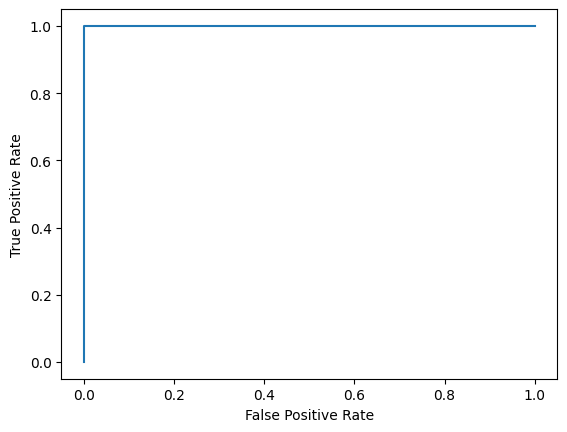

In [ ]:
#Compute Area Under the Curve (AUC) 
fpr, tpr,_=metrics.roc_curve(np.array(y_test), rfe.predict_proba(X_test)[:,1])
auc_test=metrics.auc(fpr, tpr)
print(auc_test) 

#Plot graph
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#confusion matrix
confusion=metrics.confusion_matrix(y_test, pred_test)
TP=confusion[1,1] #correctly predicted with that they do have Alzheimer's Disease ->29
TN=confusion[0,0] #correctly predicted with that they are Normal Control ->46
FP=confusion[0,1] #incorrectly predicted with that they do have Alzheimer's Disease ->1
FN=confusion[1,0] #incorrectly predicted with that they are Normal Control ->0
print(confusion)

[[46  0]
 [ 0 30]]
